In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression as LR
import numpy as np


In [3]:
import pandas as pd

In [45]:
mushrooms = pd.read_csv('mushrooms.csv')

In [46]:
mushrooms

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [48]:
m = np.asarray(mushrooms)
m

array([['p', 'x', 's', ..., 'k', 's', 'u'],
       ['e', 'x', 's', ..., 'n', 'n', 'g'],
       ['e', 'b', 's', ..., 'n', 'n', 'm'],
       ...,
       ['e', 'f', 's', ..., 'b', 'c', 'l'],
       ['p', 'k', 'y', ..., 'w', 'v', 'l'],
       ['e', 'x', 's', ..., 'o', 'c', 'l']], dtype=object)

In [94]:
y = mushrooms['class']
capShape = m[:, [1]]
capColor = m[:, [3]]
odor = m[:, [5]]

In [95]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object

In [96]:
y = np.where(y=='e',0, 1)
y = y.astype(np.float32)

In [97]:
y

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [98]:
capShape = np.where(capShape=='b', 0, capShape)
capShape = np.where(capShape=='c', 1, capShape)
capShape = np.where(capShape=='x', 2, capShape)
capShape = np.where(capShape=='f', 3, capShape)
capShape = np.where(capShape=='k', 4, capShape)
capShape = np.where(capShape=='s', 5, capShape)
capShape = capShape.astype(np.float32)

In [99]:
capShape[:20]

array([[2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [5.],
       [3.],
       [2.],
       [2.],
       [2.]], dtype=float32)

In [100]:
capColor = np.where(capColor=='n', 0, capColor)
capColor = np.where(capColor=='b', 1, capColor)
capColor = np.where(capColor=='c', 2, capColor)
capColor = np.where(capColor=='g', 3, capColor)
capColor = np.where(capColor=='r', 4, capColor)
capColor = np.where(capColor=='p', 5, capColor)
capColor = np.where(capColor=='u', 6, capColor)
capColor = np.where(capColor=='e', 7, capColor)
capColor = np.where(capColor=='w', 8, capColor)
capColor = np.where(capColor=='y', 9, capColor)
capColor = capColor.astype(np.float32)

In [101]:
capColor[:20]

array([[0.],
       [9.],
       [8.],
       [8.],
       [3.],
       [9.],
       [8.],
       [8.],
       [8.],
       [9.],
       [9.],
       [9.],
       [9.],
       [8.],
       [0.],
       [3.],
       [8.],
       [0.],
       [8.],
       [0.]], dtype=float32)

In [102]:
odor = np.where(odor=='a', 0, odor)
odor = np.where(odor=='l', 1, odor)
odor = np.where(odor=='c', 2, odor)
odor = np.where(odor=='y', 3, odor)
odor = np.where(odor=='f', 4, odor)
odor = np.where(odor=='m', 5, odor)
odor = np.where(odor=='n', 6, odor)
odor = np.where(odor=='p', 7, odor)
odor = np.where(odor=='s', 8, odor)
odor = odor.astype(np.float32)

In [103]:
odor[:20]

array([[7.],
       [0.],
       [1.],
       [7.],
       [6.],
       [0.],
       [0.],
       [1.],
       [7.],
       [0.],
       [1.],
       [0.],
       [0.],
       [7.],
       [6.],
       [6.],
       [6.],
       [7.],
       [7.],
       [7.]], dtype=float32)

In [104]:
X = np.concatenate((capShape, capColor, odor), axis=1)

In [105]:
X

array([[2., 0., 7.],
       [2., 9., 0.],
       [0., 8., 1.],
       ...,
       [3., 0., 6.],
       [4., 0., 3.],
       [2., 0., 6.]], dtype=float32)

In [106]:
model=LR()

In [107]:
model.fit(X,y)

LogisticRegression()

In [108]:
model.score(X,y)

0.6110290497291975

In [109]:
X2 = np.concatenate((capColor, odor), axis=1)

In [110]:
X2

array([[0., 7.],
       [9., 0.],
       [8., 1.],
       ...,
       [0., 6.],
       [0., 3.],
       [0., 6.]], dtype=float32)

In [170]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X2, y)

LogisticRegression(C=100000.0)

In [171]:
logreg.score(X2, y)

0.6056129985228951

In [172]:
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5

In [173]:
x_min

-0.5

In [174]:
x_max

9.5

In [175]:
y_min

-0.5

In [176]:
y_max

8.5

In [177]:
h = .02

In [178]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [179]:
xx

array([[-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48],
       [-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48],
       [-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48],
       ...,
       [-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48],
       [-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48],
       [-0.5 , -0.48, -0.46, ...,  9.44,  9.46,  9.48]])

In [180]:
xx.shape

(450, 500)

In [181]:
yy

array([[-0.5 , -0.5 , -0.5 , ..., -0.5 , -0.5 , -0.5 ],
       [-0.48, -0.48, -0.48, ..., -0.48, -0.48, -0.48],
       [-0.46, -0.46, -0.46, ..., -0.46, -0.46, -0.46],
       ...,
       [ 8.44,  8.44,  8.44, ...,  8.44,  8.44,  8.44],
       [ 8.46,  8.46,  8.46, ...,  8.46,  8.46,  8.46],
       [ 8.48,  8.48,  8.48, ...,  8.48,  8.48,  8.48]])

In [182]:
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

In [183]:
Z.shape

(225000,)

In [184]:
Z = Z.reshape(xx.shape)

In [185]:
Z

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [186]:
Z.shape

(450, 500)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


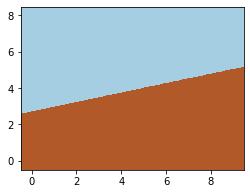

In [125]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


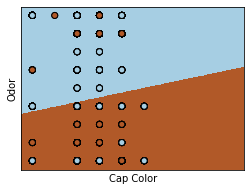

In [133]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Cap Color')
plt.ylabel('Odor')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [137]:
from sklearn.model_selection import train_test_split

In [135]:
from sklearn.naive_bayes import GaussianNB

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.4)


In [188]:
X_train

array([[7., 3.],
       [3., 2.],
       [3., 6.],
       ...,
       [9., 4.],
       [8., 4.],
       [8., 1.]], dtype=float32)

In [189]:
X_test

array([[1., 4.],
       [7., 6.],
       [3., 6.],
       ...,
       [8., 6.],
       [9., 4.],
       [8., 6.]], dtype=float32)

In [190]:
y_train

array([1., 1., 0., ..., 1., 1., 0.], dtype=float32)

In [191]:
y_test

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [192]:
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

([], [])

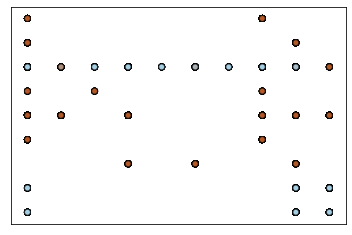

In [214]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

In [220]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [221]:
gnb.score(X_train, y_train)

0.7049651210504719

In [223]:
y_pred

array([1., 1., 0., ..., 1., 1., 1.], dtype=float32)

In [226]:
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

In [229]:
Z

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [230]:
Z = Z.reshape(xx.shape)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


<function matplotlib.pyplot.show(close=None, block=None)>

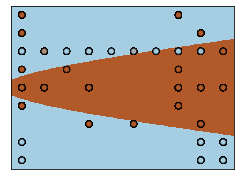

In [233]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.4)

In [236]:
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [237]:
clf = DecisionTreeClassifier()

In [239]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [240]:
clf.score(X_train, y_train)

0.988920804267542

In [241]:
y_pred

array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [242]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


<function matplotlib.pyplot.show(close=None, block=None)>

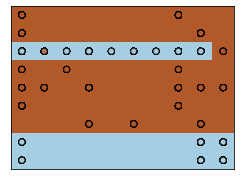

In [243]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show

In [244]:
from sklearn.neural_network import MLPClassifier

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.4)

In [246]:
x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [247]:
clf = MLPClassifier()

In [248]:
y_pred = clf.fit(X_train, y_train).predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [249]:
clf.score(X_train, y_train)

0.9470660648338121

In [250]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


<function matplotlib.pyplot.show(close=None, block=None)>

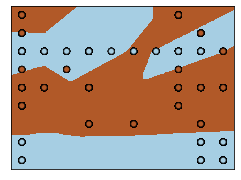

In [251]:
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.5)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show